In [3]:
import pydeck as pdk
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/codingCapricorn/Bird-Migration-Analysis-Using-Machine-Learning/refs/heads/master/bird_tracking.csv'

In [4]:
birddata = pd.read_csv(url) 

In [5]:
birddata.head(2)

altitude               date_time  device_info_serial   direction  latitude  \
0        71  2013-08-15 00:18:08+00                 851 -150.469753  49.41986   
1        68  2013-08-15 00:48:07+00                 851 -136.151141  49.41988   

   longitude  speed_2d bird_name  
0   2.120733   0.15000      Eric  
1   2.120746   2.43836      Eric

In [6]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [7]:
birddata.isna().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

In [67]:
bird_names = birddata['bird_name'].unique()
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [68]:
colors = ['red', 'green', 'blue']

In [69]:
birds_plot = {}

for names in bird_names:
    for color in colors:
        birds_plot[names] = color
        colors.remove(color)
        break

In [70]:
birds_plot

{'Eric': 'red', 'Nico': 'green', 'Sanne': 'blue'}

In [79]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Birds migration')

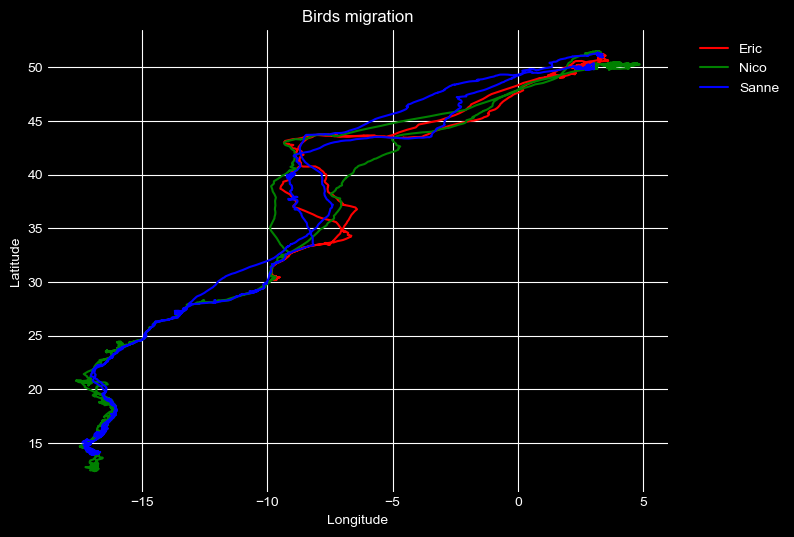

In [87]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize = (8,6))

for i, j in birds_plot.items():
    df = birddata[birddata['bird_name'] == i]
    plt.plot(df.longitude, df.latitude, color = j, label = i)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'best', bbox_to_anchor = (1.2, 1.0))
plt.title('Birds migration')

In [88]:

COUNTRIES = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_scale_rank.geojson"

view_state = pdk.ViewState(latitude=birddata['latitude'].mean(), longitude=birddata['longitude'].mean(), zoom=0.5)

# Set height and width variables
view = pdk.View(type="_GlobeView", controller=True, width=1000, height=800)


country_layer = pdk.Layer(
        "GeoJsonLayer",
        id="base-map",
        data=COUNTRIES,
        stroked=False,
        filled=True,
        get_fill_color=[200, 200, 200],
    )

layers = []
colors = {
    "Eric": [255, 0, 0], 
    "Nico": [0, 255, 0],
    "Sanne": [0, 0, 255], 
}

for species, color in colors.items():
    species_data = birddata[birddata['bird_name'] == species]
    coordinates = []
    for index, row in species_data.iterrows():
        z = row.longitude, row.latitude
        coordinates.append(z)

# Pydeck layer
    layer = pdk.Layer(
        "PathLayer",
        data=[{"path": coordinates}],
        get_path="path",
        get_color=color,
        width_scale=20,
        width_min_pixels=2,
        pickable=True
    )
    layers.append(layer)

    

deck = pdk.Deck(
    views=[view],
    initial_view_state=view_state,
    tooltip={"text": "{bird_name}"},
    layers=[country_layer, layers],
    map_provider=None,
    parameters={"cull": True},
)

deck.to_html("bird_migration.html", css_background_color="black")